<a href="https://colab.research.google.com/github/romauligraciella/Komputasi-Intelegensia/blob/main/BERT_EFCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')


#!pip install -U tensorflow==2.10
#!pip install -U tensorflow==2.9.2
import numpy as np
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split


!pip install transformers==4.37.2
#!pip install transformers==4.24
from transformers import (BertTokenizerFast, BertTokenizer, TFAutoModel,
                          TFBertForSequenceClassification, BertModel)
from transformers import TFBertModel
import IPython

#!pip install keras-tuner==1.0.4
!pip install keras-tuner
from keras_tuner.tuners import BayesianOptimization

import pickle
from sklearn.feature_extraction.text import CountVectorizer
import gensim
import gensim.downloader

import matplotlib.pyplot as plt
import tensorflow as tf


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
%cd /content/gdrive/MyDrive/Kelompok 8/Dataset
!ls

/content/gdrive/MyDrive/Kelompok 8/Dataset
dataset_clean.csv  hasil_sentimen.csv  labelled_data.csv  test_prediction.csv


In [ ]:
#DATA DARI HASIL ANALISIS SENTIMEN PAKAI GPT

sentimen = pd.read_csv('hasil_sentimen.csv', usecols=['Comment', 'New_dataset', 'pred_label'])
sentimen

,Comment,New_dataset,pred_label
0,Bagus negara'best bangun negaramaju Indonesiak...,bagus negarabest bangun negaramaju indonesiaku...,1
1,Ada asing bahasa dari kita anggris bukan En...,asing bahasa anggris enggris x,0
2,APAKAH PERAYAAN PERINGATAN HUT KEMERDEKAAN. RI...,perayaan peringatan hut kemerdekaan ri thn tgl...,0
3,Puji syukur kami panjatkan kepada Tuhan saja i...,puji syukur panjatkan tuhan gembira ya makasih...,1
4,"Malam m w w, Salam sejahtera, omswastiatu, Nam...",malam w w salam sejahtera omswastiatu namo bud...,0
...,...,...,...
6396,"Kita harus lihat ke depannya Indonesia, mungki...",lihat depannya indonesia berkembang maju pemba...,1
6397,Andai kata VOC masih berdiri.. mereka seneng b...,andai voc berdiri seneng banget ikutan invest ...,0
6398,Betul liat fakta aja.....kebejatan uda merajalela,liat fakta ajakebejatan uda merajalela,0
6399,emangnya apa hal yg akan membuat sebuah negara...,emangnya yg negara berprestasi internasional k...,1


# Representasi BERT

In [ ]:
from tensorflow import keras
from transformers import AutoTokenizer, TFAutoModel
import IPython

bert_tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
bert_model = TFAutoModel.from_pretrained("indobenchmark/indobert-base-p2", trainable=False)

def tokenisasi(teks):
    encode_dict = bert_tokenizer(teks,
                                   add_special_tokens = True,
                                   max_length = 128,
                                   padding = 'max_length',
                                   truncation = True,
                                   return_attention_mask = True,
                                   return_tensors = 'tf',)

    tokenID = encode_dict['input_ids']
    attention_mask = encode_dict['attention_mask']

    return tokenID, attention_mask
    return tokenID

def create_input(data):
    tokenID, input_mask = [], []
    for teks in data:
        token, mask = tokenisasi(teks)
        tokenID.append(token)
        input_mask.append(mask)

    return [np.asarray(tokenID, dtype=np.int32).reshape(-1, 128),
            np.asarray(input_mask, dtype=np.int32).reshape(-1, 128)]



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some layers from the model checkpoint at indobenchmark/indobert-base-p2 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p2.
If your

In [ ]:
train_data = create_input(sentimen['New_dataset'])[0]
train_data

array([[   2, 1305,  664, ...,    0,    0,    0],
       [   2, 2945,  744, ...,    0,    0,    0],
       [   2, 8245, 5546, ...,    0,    0,    0],
       ...,
       [   2, 4961, 4014, ...,    0,    0,    0],
       [   2, 5184,   57, ...,    0,    0,    0],
       [   2, 1553,  960, ...,    0,    0,    0]], dtype=int32)

# Model EFCM

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 5)
data = svd.fit_transform(train_data)

In [ ]:
#!gdown 1wO--Xq6Xv1QhYGrIcgawh4uyg0W21sKJ

In [ ]:
%cd /content/gdrive/MyDrive/Kelompok 8/
!ls

/content/gdrive/MyDrive/Kelompok 8
Data  Dataset  FCMeans	w2v-model.bin


In [ ]:
from sklearn.cluster import KMeans
import sys
sys.path.insert(0, "/content/gdrive/MyDrive/Kelompok 8/FCMeans")

In [ ]:
# Proses data per iterasi
total_data = sentimen['New_dataset'].shape[0]  # Jumlah total data
batch_size = 256 # Jumlah data per iterasi
num_iterations = int(np.ceil(total_data / batch_size))  # Jumlah iterasi yang diperlukan

output = []  # Variabel untuk menyimpan hasil

for i in range(num_iterations):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, total_data)
    batch_data = sentimen['New_dataset'].iloc[start_idx:end_idx].to_numpy()

    seq_words = create_input(batch_data)
    bert_emb = bert_model(seq_words)[1]
    output.append(bert_emb)

output = np.concatenate(output, axis=0)

output_shape = output.shape
print("Output shape:", output_shape)

Output shape: (6401, 768)


## Model FCMeans

In [ ]:
"""
fcmeans.py : Fuzzy C-means clustering algorithm.
"""
import numpy as np
from scipy.spatial.distance import cdist


def _fcmeans0(data, u_old, c, m):
    """
    Single step in generic fuzzy c-means clustering algorithm.

    Modified from Ross, Fuzzy Logic w/Engineering Applications (2010),
    pages 352-353, equations 10.28 - 10.35.

    Parameters inherited from fcmeans()
    """
    # Normalizing, then eliminating any potential zero values.
    u_old /= np.ones((c, 1)).dot(np.atleast_2d(u_old.sum(axis=0)))
    u_old = np.fmax(u_old, np.finfo(np.float64).eps)

    um = u_old ** m

    # Calculate cluster centers
    data = data.T
    cntr = um.dot(data) / (np.ones((data.shape[1],1)).dot(np.atleast_2d(um.sum(axis=1))).T)

    d = _distance(data, cntr)
    d = np.fmax(d, np.finfo(np.float64).eps)

    jm = (um * d ** 2).sum()

    u = d ** (- 2. / (m - 1))
    u /= np.ones((c, 1)).dot(np.atleast_2d(u.sum(axis=0)))

    return cntr, u, jm, d


def _distance(data, centers):
    """
    Euclidean distance from each point to each cluster center.

    Parameters
    ----------
    data : 2d array (N x Q)
        Data to be analyzed. There are N data points.
    centers : 2d array (C x Q)
        Cluster centers. There are C clusters, with Q features.

    Returns
    -------
    dist : 2d array (C x N)
        Euclidean distance from each point, to each cluster center.

    See Also
    --------
    scipy.spatial.distance.cdist
    """
    return cdist(data, centers).T


def _fp_coeff(u):
    """
    Fuzzy partition coefficient `fpc` relative to fuzzy c-partitioned
    matrix `u`. Measures 'fuzziness' in partitioned clustering.

    Parameters
    ----------
    u : 2d array (C, N)
        Fuzzy c-partitioned matrix; N = number of data points and C = number
        of clusters.

    Returns
    -------
    fpc : float
        Fuzzy partition coefficient.

    """
    n = u.shape[1]

    return np.trace(u.dot(u.T)) / float(n)


def fcmeans(data, c, m, error, maxiter, init=None, seed=None):
    """
    Fuzzy c-means clustering algorithm [1].

    Parameters
    ----------
    data : 2d array, size (S, N)
        Data to be clustered.  N is the number of data sets; S is the number
        of features within each sample vector.
    c : int
        Desired number of clusters or classes.
    m : float
        Array exponentiation applied to the membership function u_old at each
        iteration, where U_new = u_old ** m.
    error : float
        Stopping criterion; stop early if the norm of (u[p] - u[p-1]) < error.
    maxiter : int
        Maximum number of iterations allowed.
    init : 2d array, size (S, c)
        Initial cluster centers. If none provided, algorithm is
        randomly initialized.
    seed : int
        If provided, sets random seed of init. No effect if init is
        provided. Mainly for debug/testing purposes.

    Returns
    -------
    cntr : 2d array, size (S, c)
        Cluster centers.  Data for each center along each feature provided
        for every cluster (of the `c` requested clusters).
    u : 2d array, (c, N)
        Final fuzzy c-partitioned matrix.
    u0 : 2d array, (c, N)
        Initial guess at fuzzy c-partitioned matrix (either provided init or
        random guess used if init was not provided).
    d : 2d array, (c, N)
        Final Euclidian distance matrix.
    jm : 1d array, length P
        Objective function history.
    p : int
        Number of iterations run.
    fpc : float
        Final fuzzy partition coefficient.


    Notes
    -----
    The algorithm implemented is from Ross et al. [1]_.

    Fuzzy C-Means has a known problem with high dimensionality datasets, where
    the majority of cluster centers are pulled into the overall center of
    gravity. If you are clustering data with very high dimensionality and
    encounter this issue, another clustering method may be required. For more
    information and the theory behind this, see Winkler et al. [2]_.

    References
    ----------
    .. [1] Ross, Timothy J. Fuzzy Logic With Engineering Applications, 3rd ed.
           Wiley. 2010. ISBN 978-0-470-74376-8 pp 352-353, eq 10.28 - 10.35.

    .. [2] Winkler, R., Klawonn, F., & Kruse, R. Fuzzy c-means in high
           dimensional spaces. 2012. Contemporary Theory and Pragmatic
           Approaches in Fuzzy Computing Utilization, 1.
    """
    # Setup cntr
    if init is None:
        if seed is not None:
            np.random.seed(seed=seed)
        S = data.shape[0]
        cntr = np.random.rand(S, c)
        init = cntr.copy()

    cntr = init

    # Setup u
    d = _distance(data.T, cntr.T)
    d = np.fmax(d, np.finfo(np.float64).eps)
    u = d ** (- 2. / (m - 1))
    u /= np.ones((c, 1)).dot(np.atleast_2d(u.sum(axis=0)))


    # Initialize loop parameters
    jm = np.zeros(0)
    p = 0

    # Main cmeans loop
    while p < maxiter - 1:
        upre = u.copy()
        [cntr, u, Jjm, d] = _fcmeans0(data, upre, c, m)
        jm = np.hstack((jm, Jjm))
        p += 1

        # Stopping rule
        if np.linalg.norm(u - upre) < error:
            break

    # Final calculations
    error = np.linalg.norm(u - upre)
    fpc = _fp_coeff(u)

    #return cntr, u, u0, d, jm, p, fpc
    return cntr, u
    #return cntr


def fcmeans_predict(test_data, cntr_trained, m, error, maxiter, init=None,
                   seed=None):
    """
    Prediction of new data in given a trained fuzzy c-means framework [1].

    Parameters
    ----------
    test_data : 2d array, size (S, N)
        New, independent data set to be predicted based on trained c-means
        from ``cmeans``. N is the number of data sets; S is the number of
        features within each sample vector.
    cntr_trained : 2d array, size (S, c)
        Location of trained centers from prior training c-means.
    m : float
        Array exponentiation applied to the membership function u_old at each
        iteration, where U_new = u_old ** m.
    error : float
        Stopping criterion; stop early if the norm of (u[p] - u[p-1]) < error.
    maxiter : int
        Maximum number of iterations allowed.
    init : 2d array, size (S, N)
        Initial fuzzy c-partitioned matrix. If none provided, algorithm is
        randomly initialized.
    seed : int
        If provided, sets random seed of init. No effect if init is
        provided. Mainly for debug/testing purposes.

    Returns
    -------
    u : 2d array, (S, N)
        Final fuzzy c-partitioned matrix.
    u0 : 2d array, (S, N)
        Initial guess at fuzzy c-partitioned matrix (either provided init or
        random guess used if init was not provided).
    d : 2d array, (S, N)
        Final Euclidian distance matrix.
    jm : 1d array, length P
        Objective function history.
    p : int
        Number of iterations run.
    fpc : float
        Final fuzzy partition coefficient.

    Notes
    -----
    Ross et al. [1]_ did not include a prediction algorithm to go along with
    fuzzy c-means. This prediction algorithm works by repeating the clustering
    with fixed centers, then efficiently finds the fuzzy membership at all
    points.

    References
    ----------
    .. [1] Ross, Timothy J. Fuzzy Logic With Engineering Applications, 3rd ed.
           Wiley. 2010. ISBN 978-0-470-74376-8 pp 352-353, eq 10.28 - 10.35.
    """
    c = cntr_trained.shape[0]

    # Setup u0
    if init is None:
        if seed is not None:
            np.random.seed(seed=seed)
        n = test_data.shape[1]
        u0 = np.random.rand(c, n)
        u0 /= np.ones(
            (c, 1)).dot(np.atleast_2d(u0.sum(axis=0))).astype(np.float64)
        init = u0.copy()
    u0 = init
    u = np.fmax(u0, np.finfo(np.float64).eps)

    # Initialize loop parameters
    jm = np.zeros(0)
    p = 0

    # Main cmeans loop
    while p < maxiter - 1:
        u2 = u.copy()
        [u, Jjm, d] = _fcmeans_predict0(test_data, cntr_trained, u2, c, m)
        jm = np.hstack((jm, Jjm))
        p += 1

        # Stopping rule
        if np.linalg.norm(u - u2) < error:
            break

    # Final calculations
    error = np.linalg.norm(u - u2)
    fpc = _fp_coeff(u)

    return u, u0, d, jm, p, fpc


def _fcmeans_predict0(test_data, cntr, u_old, c, m):
    """
    Single step in fuzzy c-means prediction algorithm. Clustering algorithm
    modified from Ross, Fuzzy Logic w/Engineering Applications (2010)
    p.352-353, equations 10.28 - 10.35, but this method to generate fuzzy
    predictions was independently derived by Josh Warner.

    Parameters inherited from cmeans()

    Very similar to initial clustering, except `cntr` is not updated, thus
    the new test data are forced into known (trained) clusters.
    """
    # Normalizing, then eliminating any potential zero values.
    u_old /= np.ones((c, 1)).dot(np.atleast_2d(u_old.sum(axis=0)))
    u_old = np.fmax(u_old, np.finfo(np.float64).eps)

    um = u_old ** m
    test_data = test_data.T

    # For prediction, we do not recalculate cluster centers. The test_data is
    # forced to conform to the prior clustering.

    d = _distance(test_data, cntr)
    d = np.fmax(d, np.finfo(np.float64).eps)

    jm = (um * d ** 2).sum()

    u = d ** (- 2. / (m - 1))
    u /= np.ones((c, 1)).dot(np.atleast_2d(u.sum(axis=0)))

    return u, jm, d


## Word2Vec

In [ ]:
### Interpretasi topik


## Fungsi c-TFIDF
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range).fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_words_per_topic(tf_idf, count, docs_per_topic, n = 10):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    top_words = []
    for i in range(len(labels)):
      top_words.append([words[j] for j in indices [i]][::-1])
    return top_words

In [ ]:
%cd /content/gdrive/MyDrive/Kelompok 8/
!ls

/content/gdrive/MyDrive/Kelompok 8
Data  Dataset  FCMeans	w2v-model.bin


In [ ]:
#Nilai Coherence

# Call word2vec
import gensim
import gensim.downloader

### Memuat Model Word2Vec
w2v_model = gensim.models.Word2Vec.load("/content/gdrive/MyDrive/Kelompok 8/Data/word2vec/idwiki-berita/w2v-model.bin")

def calculate_coherence(w2v_model, term_rankings):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for i in range(len(term_rankings[topic_index])):
            for j in range(i + 1, len(term_rankings[topic_index])):
                term_i = term_rankings[topic_index][i]
                term_j = term_rankings[topic_index][j]
                if term_i in w2v_model.wv.key_to_index and term_j in w2v_model.wv.key_to_index:
                    pair_scores.append(w2v_model.wv.similarity(term_i, term_j))

        # get the mean for all pairs in this topic
        if pair_scores:
            topic_score = sum(pair_scores) / len(pair_scores)
            overall_coherence += topic_score

    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [ ]:
# Cek N topik terbaik

num_topics = []
coherences = []

for n_topics in range(1, 10):  # Try values from 1 to 10
    print("The number of topics is " + str(n_topics))

    coherence_sim = []
    for i in range(1, 4):  # Perform simulations
        print("Simulation " + str(i))

        # Topic detection
        m = 1.1
        initkm = KMeans(n_clusters=n_topics, n_init=1).fit(data)
        cntr, u = fcmeans(data.T, n_topics, m, error=0.0001, maxiter=200, init=initkm.cluster_centers_.T)
        cluster_membership = np.argmax(u, axis=0)

        docs = pd.DataFrame(list(sentimen["New_dataset"]), columns=["Doc"])
        docs['Topic'] = cluster_membership
        docs['Doc_ID'] = range(len(docs))
        docs_per_topic = docs.dropna(subset=['Doc']).groupby(['Topic'], as_index=False).agg({'Doc': ' '.join})

        tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))
        top_words = extract_top_words_per_topic(tf_idf, count, docs_per_topic, 10)

        coherence_sim.append(calculate_coherence(w2v_model, top_words))
        print('Coherence value:', coherence_sim[i-1])

    num_topics.append(n_topics)
    coherences.append(coherence_sim)

best_num_topics = num_topics[np.argmax(np.mean(coherences, axis=1))]
best_coherence = np.max(np.mean(coherences, axis=1))

print("Best number of topics:", best_num_topics)
print("Best coherence:", best_coherence)


The number of topics is 1
Simulation 1
Coherence value: 0.24327553787993061
Simulation 2
Coherence value: 0.24327553787993061
Simulation 3
Coherence value: 0.24327553787993061
The number of topics is 2
Simulation 1
Coherence value: 0.2400765134435561
Simulation 2
Coherence value: 0.2400765134435561
Simulation 3
Coherence value: 0.2400765134435561
The number of topics is 3
Simulation 1
Coherence value: 0.22173419104958023
Simulation 2
Coherence value: 0.22293064246575037
Simulation 3
Coherence value: 0.22293064246575037
The number of topics is 4
Simulation 1
Coherence value: 0.2294556396599445
Simulation 2
Coherence value: 0.2294556396599445
Simulation 3
Coherence value: 0.2294556396599445
The number of topics is 5
Simulation 1
Coherence value: 0.2184799202945497
Simulation 2
Coherence value: 0.22359670456084943
Simulation 3
Coherence value: 0.2184799202945497
The number of topics is 6
Simulation 1
Coherence value: 0.22094843667345465
Simulation 2
Coherence value: 0.22094843667345465
Si

In [ ]:
second_best_idx = np.argsort(np.mean(coherences, axis=1))[-2]
second_best_num_topics = num_topics[second_best_idx]
second_best_coherence = np.mean(coherences, axis=1)[second_best_idx]

new_num_topics = best_num_topics + second_best_num_topics

print("Best number of topics:", new_num_topics)
print("Second Best coherence:", second_best_coherence)

Best number of topics: 3
Second Best coherence: 0.2400765134435561


In [ ]:
# Pendeteksian Topik

m =1.1
n_topics = new_num_topics
initkm = KMeans(n_clusters=n_topics, n_init=1).fit(data)
cntr, u = fcmeans(data.T, n_topics, m, error=0.0001, maxiter=200, init=initkm.cluster_centers_.T)
cluster_membership = np.argmax(u, axis=0)

#### Class Based TFIDF (C-TFIDF) Functions
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range).fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_words_per_topic(tf_idf, count, docs_per_topic, n = 10):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    top_words = []
    for i in range(len(labels)):
      top_words.append([words[j] for j in indices [i]][::-1])
    return top_words

#### Representasi topik
docs = pd.DataFrame(list(sentimen["New_dataset"]), columns=["Doc"])
docs['Topic'] = cluster_membership
docs['Doc_ID'] = range(len(docs))
docs_per_topic = docs.dropna(subset=['Doc']).groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))
top_words = extract_top_words_per_topic(tf_idf, count, docs_per_topic, 10)
print(top_words)

[['indonesia', 'ikn', 'bang', 'negara', 'jokowi', 'semoga', 'ya', 'maju', 'yg', 'orang'], ['yg', 'negara', 'indonesia', 'rakyat', 'kota', 'ikn', 'orang', 'jokowi', 'gak', 'pembangunan'], ['ikn', 'indonesia', 'yg', 'negara', 'jokowi', 'rakyat', 'pembangunan', 'presiden', 'gak', 'kota']]


In [ ]:
for bin in zip(range(len(top_words)),top_words):
  print(f"Kata penyusun topik {bin[0]+1} adalah {bin[1]}")

Kata penyusun topik 1 adalah ['indonesia', 'ikn', 'bang', 'negara', 'jokowi', 'semoga', 'ya', 'maju', 'yg', 'orang']
Kata penyusun topik 2 adalah ['yg', 'negara', 'indonesia', 'rakyat', 'kota', 'ikn', 'orang', 'jokowi', 'gak', 'pembangunan']
Kata penyusun topik 3 adalah ['ikn', 'indonesia', 'yg', 'negara', 'jokowi', 'rakyat', 'pembangunan', 'presiden', 'gak', 'kota']


In [ ]:
coherence = []
for i in coherences:
  coherence.append(max(i))
print(coherence)

[0.24327553787993061, 0.2400765134435561, 0.22293064246575037, 0.2294556396599445, 0.22359670456084943, 0.23065857242240953, 0.22939828871971088, 0.22308661587432857, 0.23041689368769708]


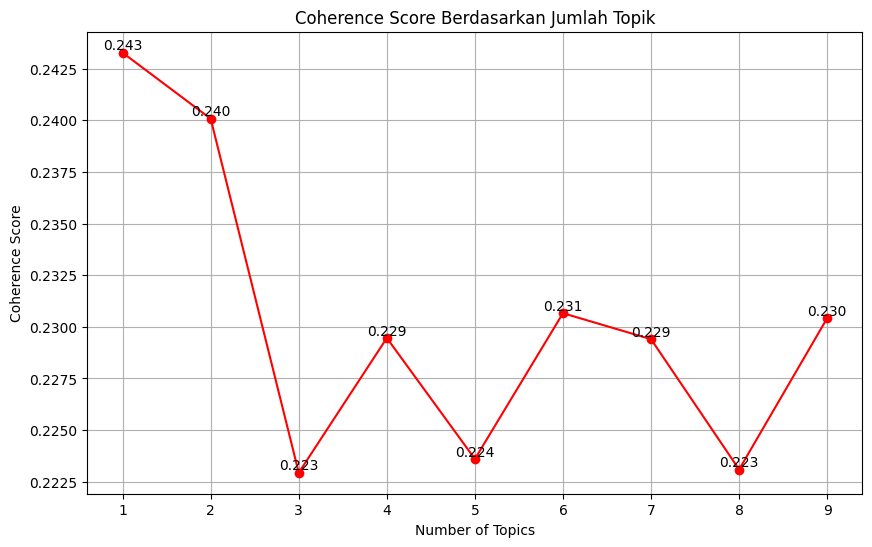

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,10), coherence, marker='o', color='r')

for i in range(1,10):
    plt.text(i, coherence[i-1], f'{coherence[i-1]:.3f}', ha='center', va='bottom')

plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score Berdasarkan Jumlah Topik')
plt.grid(True)
plt.show()

In [ ]:
docs[docs["Topic"]==0]

,Doc,Topic,Doc_ID
1,asing bahasa anggris enggris x,0,1
3,puji syukur panjatkan tuhan gembira ya makasih...,0,3
5,alhamdulillah lapangan pekerjaan rakyat indone...,0,5
7,ikn seharah peradaban purba,0,7
12,pengen upacara agustus ikn,0,12
...,...,...,...
6394,cina nyajangan tuh proyek pulau reklamasi pant...,0,6394
6395,gk sabar tenar jangka perubahan menyesuaikan,0,6395
6398,liat fakta ajakebejatan uda merajalela,0,6398
6399,emangnya yg negara berprestasi internasional k...,0,6399


In [ ]:
sentimen['Topic'] = docs["Topic"].copy()
sentimen

,Comment,New_dataset,pred_label,Topic
0,Bagus negara'best bangun negaramaju Indonesiak...,bagus negarabest bangun negaramaju indonesiaku...,1,2
1,Ada asing bahasa dari kita anggris bukan En...,asing bahasa anggris enggris x,0,0
2,APAKAH PERAYAAN PERINGATAN HUT KEMERDEKAAN. RI...,perayaan peringatan hut kemerdekaan ri thn tgl...,0,2
3,Puji syukur kami panjatkan kepada Tuhan saja i...,puji syukur panjatkan tuhan gembira ya makasih...,1,0
4,"Malam m w w, Salam sejahtera, omswastiatu, Nam...",malam w w salam sejahtera omswastiatu namo bud...,0,1
...,...,...,...,...
6396,"Kita harus lihat ke depannya Indonesia, mungki...",lihat depannya indonesia berkembang maju pemba...,1,2
6397,Andai kata VOC masih berdiri.. mereka seneng b...,andai voc berdiri seneng banget ikutan invest ...,0,2
6398,Betul liat fakta aja.....kebejatan uda merajalela,liat fakta ajakebejatan uda merajalela,0,0
6399,emangnya apa hal yg akan membuat sebuah negara...,emangnya yg negara berprestasi internasional k...,1,0


In [ ]:
lis_topik = {}
for i in range(len(top_words)):
  lis_topik[i] = top_words[i]

In [ ]:
df = sentimen[["pred_label", "Topic"]].copy()
df

,pred_label,Topic
0,1,2
1,0,0
2,0,2
3,1,0
4,0,1
...,...,...
6396,1,2
6397,0,2
6398,0,0
6399,1,0


In [ ]:
df["pred_label"].replace({0:"Negatif",1:"Positif"}, inplace=True)

In [ ]:
df = df.sort_values(by=['Topic'], ascending=True)

In [ ]:
for i in range(len(top_words)):
  df["Topic"].replace({i:f"Topik {i+1}"}, inplace=True)

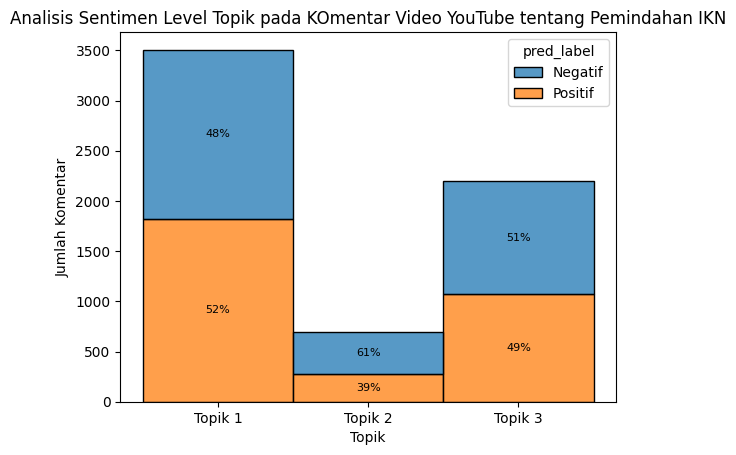

In [ ]:
import pandas as pd
import seaborn as sns

ax = sns.histplot(df, x="Topic", hue='pred_label', multiple='stack')
ax.set(title="Analisis Sentimen Level Topik pada KOmentar Video YouTube tentang Pemindahan IKN")
ax.set_ylabel("Jumlah Komentar")
ax.set_xlabel("Topik")

for i, c in enumerate(ax.containers):
    # customize the label to account for cases when there might not be a bar section - with assignment expression (h := ...)
    panjang = []
    for i in range(len(top_words)):
      panjang.append(len(df[df["Topic"] == f"Topik {i+1}"]))
    labels = [f'{h:0.0f}' if (h := v.get_height()) > 0 else '' for v in c]
    lab = [int(label) for label in labels]
    per = []
    for i in range(len(top_words)):
      per.append(((lab[i]/panjang[i])*100))
    percent = [f'{h:0.0f}%' for h in per]
    ax.bar_label(c, labels=percent, label_type='center', fontsize=8)

plt.show()

In [ ]:
df["Topic"].unique()

array(['Topik 1', 'Topik 2', 'Topik 3'], dtype=object)

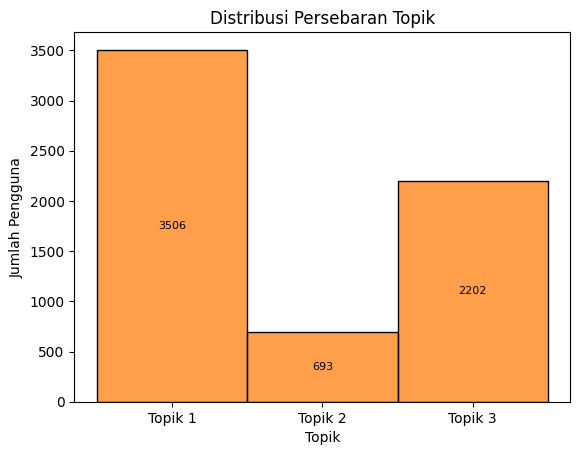

In [ ]:
ax = sns.histplot(df, x="Topic", color='tab:orange')
ax.set(title="Distribusi Persebaran Topik")
ax.set_ylabel("Jumlah Pengguna")
ax.set_xlabel("Topik")

for i, c in enumerate(ax.containers):
    labels = [f'{h:0.0f}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)